C:\Users\theob\AppData\Roaming\Python\Python310\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\theob\AppData\Roaming\Python\Python310\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\theob\AppData\Roaming\Python\Python310\site-packages\umap\distanc

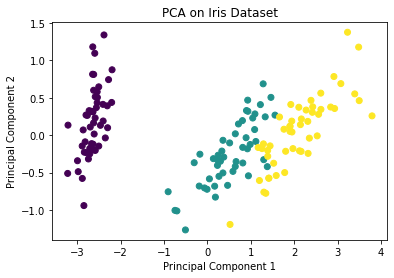

In [1]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap#carefull run pip install umap-learn, not umap
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply PCA
pca = PCA(n_components=2)
X_transformed = pca.fit_transform(X)

# Plot the transformed data
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Iris Dataset')
plt.show()


c:\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


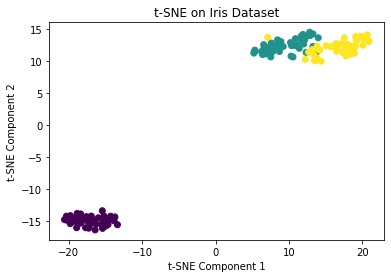

In [2]:
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_transformed = tsne.fit_transform(X)

# Plot the transformed data
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE on Iris Dataset')
plt.show()

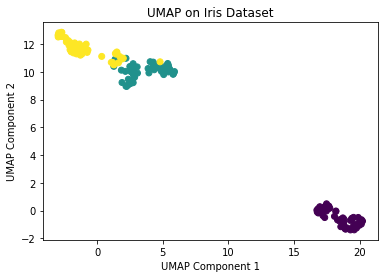

In [3]:
# Apply UMAP
umap_obj = umap.UMAP(n_components=2, random_state=42)
X_transformed = umap_obj.fit_transform(X)

# Plot the transformed data
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap='viridis')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP on Iris Dataset')
plt.show()


In [4]:
from utils import embedding, visualization, weights
from data import preprocessing



In [8]:
from sklearn.utils import shuffle
X_a,y_a = shuffle(X,y)

X = X[0:10,:]
y = y[0:10]

Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 90.33it/s]


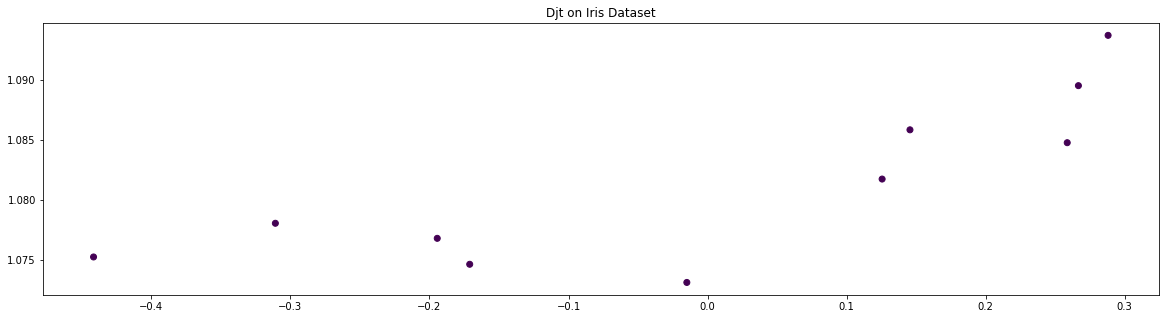

In [9]:
X_trans, y_trans = preprocessing.remove_duplicities(X, y)
embeddings = embedding.embed_data(X_trans, weight_fun=weights.reciprocal, walk_length=100, num_walks=10)
visualization.show_embedding(embeddings, labels=y_trans, show_numbers=False, aspect='auto',title="Djt on Iris Dataset")